## Interactive HTML Widgets

Installation: <code>pip install ipywidgets</code>

The interactive widgets do not work of github viewer. You'll need to download and run this in your IPython/Jupyter environment.

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import *

In [111]:
def show_fib(N):
    sequence = ""
    a, b = 1, 1
    for i in range(N):
        sequence += "{0} ".format(a)
        a, b = b, a + b
    return sequence.strip()

print show_fib(13)

1 1 2 3 5 8 13 21 34 55 89 144 233


In [110]:
interact(show_fib, N=(1, 25))

'1 1 2 3 5 8 13 21 34 55 89 144 233'

<function __main__.show_fib>

Using widgets with plots:

In [3]:
def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE', 'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color, lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)

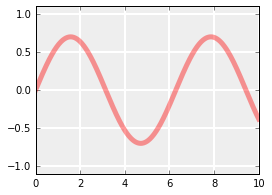

In [4]:
interact(plot, 
         amplitude = (0.1, 1.0, 0.1),
         color     = (['blue', 'green', 'red']))

Symbolic Computation and latex (and widget layout):

In [112]:
from IPython.display import display, Math, Latex
from sympy           import Symbol, Eq, factor, latex

x = Symbol('x')

# Create a factorization function
def factorit(n):
    return display(Math(latex(Eq(x ** n - 1, factor(x ** n - 1)))))

# we can save the interact object's id, and change its attributes
w = interact(factorit, n=(2, 20))
w.widget.font_size   = 25
w.widget.color       = 'blue'
w.widget.font_family = 'Courier New'
display(w)

<IPython.core.display.Math object>

Growth of functions:

In [1]:
def poly_growth(n_min, n_max, exponent, breaks=20):
    """Polynomial growth"""
    ns = np.linspace(n_min, n_max, breaks)
    return ns ** exponent

def exp_growth(n_min, n_max, exponent, breaks=20):
    """Expotential growth"""
    ns = np.linspace(n_min, n_max, breaks)
    return exponent ** ns   

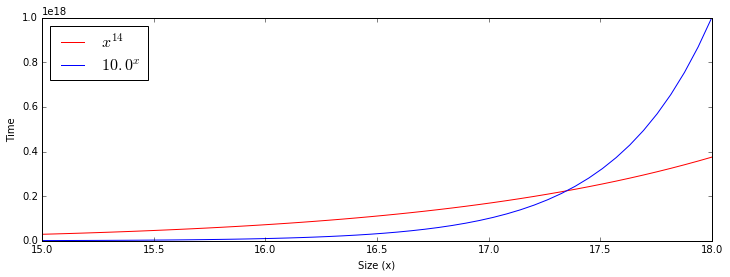

<function __main__.plot_curves>

In [9]:
def plot_curves(n_min, n_max, exponent_pol, exponent_exp, breaks=20):
    
    polys = poly_growth(n_min, n_max, exponent_pol, breaks)
    exps  =  exp_growth(n_min, n_max, exponent_exp, breaks)

    ns = np.linspace(n_min, n_max, breaks)
    
    fig = plt.figure(figsize=(12, 4))
    plt.plot(ns, polys, 'r', label="$x^{%d}$"  % exponent_pol)  
    plt.plot(ns, exps,  'b', label="$%1.1f^x$" % exponent_exp)
    plt.xlabel('Size (x)')
    plt.ylabel('Time')
    plt.legend(loc="upper left", fontsize=16)
    plt.show()

interact(plot_curves,
         n_min        = widgets.IntSlider  (min=1, max=50, step=1,   value=15, description="$x_{min}$"),
         n_max        = widgets.IntSlider  (min=2, max=50, step=1,   value=18, description="$x_{max}$"),
         exponent_pol = widgets.IntSlider  (min=1, max=25, step=1,   value=14, description="$x^n$"),
         exponent_exp = widgets.FloatSlider(min=1, max=15, step=0.1, value=10, description="$n^x$"),
         breaks       = widgets.fixed(50))

Message sending between widgets

In [11]:
# from ipywidgets import widgets

outputText = widgets.Text()
outputText

In [12]:
inputText = widgets.Text()

def upperCase(sender):
    outputText.value = inputText.value.upper()
    
inputText.on_submit(upperCase)
inputText   # enter text and press ENTER, it will be sent to outputText

Check many examples at [https://github.com/ipython/ipywidgets/tree/master/examples](https://github.com/ipython/ipywidgets/tree/master/examples)